In [1]:
import yfinance as yf

# Download historical data
ticker = 'AAPL'  # Example: Apple Inc.
data = yf.download(ticker, start='2020-01-01', end='2024-01-01')

[*********************100%%**********************]  1 of 1 completed


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.960472,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.826859,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.650337,132079200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load data into DataFrame
df = pd.DataFrame(data)

# Handle missing values (e.g., forward fill)
df.fillna(method='ffill', inplace=True)

# Feature scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume']])
scaled_df = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

C:\Users\manmo\AppData\Local\Temp\ipykernel_1696\173439287.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [4]:
# Create target variable
scaled_df['Target'] = scaled_df['Close'].shift(-1)

# Drop the last row with NaN target value
scaled_df.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data
X = scaled_df[['Open', 'High', 'Low', 'Volume']]
y = scaled_df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.00037357488662474666


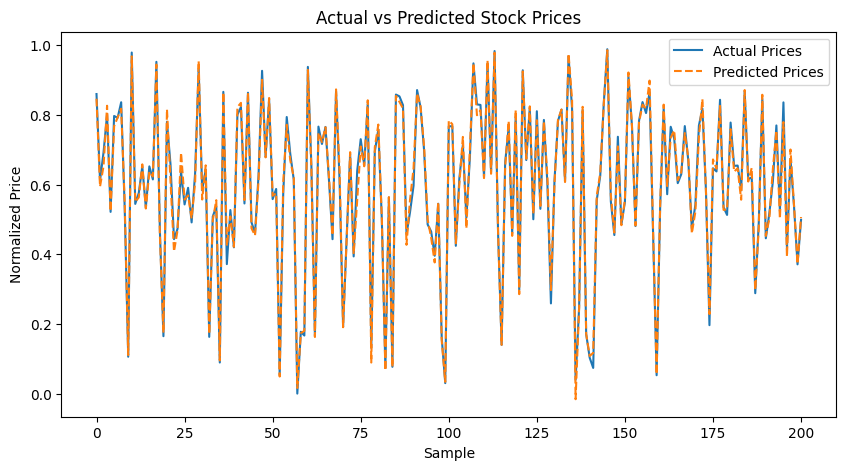

In [7]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices', linestyle='--')
plt.legend()
plt.xlabel('Sample')
plt.ylabel('Normalized Price')
plt.title('Actual vs Predicted Stock Prices')
plt.show()